## **Predicting DDoS Attacks in Network Traffic**


In today's digital landscape, Distributed Denial of Service (DDoS) attacks pose a significant threat to the availability and reliability of online services. These attacks overwhelm a target system with traffic from multiple sources, rendering it inaccessible to legitimate users. As organizations increasingly rely on digital infrastructure, the ability to detect and mitigate DDoS attacks has become critical.
This dataset contains network flow records that can be used to predict whether a given flow is benign or indicative of a DDoS attack. Each record includes various features that provide insights into the nature of the network traffic.

## **About the Dataset**

The Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv dataset is part of the CICIDS dataset, created by the Canadian Institute for Cybersecurity (CIC). The CICIDS dataset simulates realistic network traffic and includes various types of attacks, such as DDoS, brute force, and phishing. It is designed for evaluating intrusion detection systems (IDS) and cybersecurity algorithms.

The specific file focuses on a DDoS attack scenario that occurred on a Friday afternoon during regular working hours. It contains labeled features extracted from the captured network traffic.

You can access the dataset at this link: https://www.unb.ca/cic/datasets/index.html.

# *Key Features in the Dataset*

Flow ID: Unique identifier for each network flow.

Source IP: IP address of the source.

Source Port: Port number used by the source.

Destination IP: IP address of the destination.

Destination Port: Port number used by the destination.

Protocol: Network protocol used (e.g., TCP, UDP).

Timestamp: Date and time when the flow started.

Flow Duration: Duration of the network flow in microseconds.

Total Fwd Packets: Number of packets sent from the source to the destination.

Total Backward Packets: Number of packets sent from the destination to the source.

Total Length of Fwd Packets: Total size (in bytes) of packets sent forward.

Total Length of Bwd Packets: Total size (in bytes) of packets sent backward.

Fwd Packet Length Max: Maximum size of forward packets.

Fwd Packet Length Min: Minimum size of forward packets.

Fwd Packet Length Mean: Mean size of forward packets.

Fwd Packet Length Std: Standard deviation of forward packet sizes.

Bwd Packet Length Max: Maximum size of backward packets.

Bwd Packet Length Min: Minimum size of backward packets.

Bwd Packet Length Mean: Mean size of backward packets.

Bwd Packet Length Std: Standard deviation of backward packet sizes.

Flow Bytes/s: Number of bytes transferred per second.

Flow Packets/s: Number of packets transferred per second.

Flow IAT Mean: Mean time between two consecutive packets in a flow.

Flow IAT Std: Standard deviation of time between packets.

Flow IAT Max: Maximum inter-arrival time between packets.

Flow IAT Min: Minimum inter-arrival time between packets.

Fwd IAT Total: Total inter-arrival time for forward packets.

Fwd IAT Mean: Mean inter-arrival time for forward packets.

Fwd IAT Std: Standard deviation of forward packet inter-arrival time.

Fwd IAT Max: Maximum forward packet inter-arrival time.

Fwd IAT Min: Minimum forward packet inter-arrival time.

Bwd IAT Total: Total inter-arrival time for backward packets.

Bwd IAT Mean: Mean inter-arrival time for backward packets.

Bwd IAT Std: Standard deviation of backward packet inter-arrival time.

Bwd IAT Max: Maximum backward packet inter-arrival time.

Bwd IAT Min: Minimum backward packet inter-arrival time.

Fwd PSH Flags: Number of forward packets with PSH (Push) flag set.

Bwd PSH Flags: Number of backward packets with PSH flag set.

Fwd URG Flags: Number of forward packets with URG (Urgent) flag set.

Bwd URG Flags: Number of backward packets with URG flag set.

Fwd Header Length: Total length of forward headers.

Bwd Header Length: Total length of backward headers.

Fwd Packets/s: Number of forward packets per second.

Bwd Packets/s: Number of backward packets per second.

Min Packet Length: Minimum packet length in the flow.

Max Packet Length: Maximum packet length in the flow.

Packet Length Mean: Mean packet length in the flow.

Packet Length Std: Standard deviation of packet length in the flow.

Packet Length Variance: Variance of packet length in the flow.

FIN Flag Count: Number of packets with the FIN (Finish) flag set.

SYN Flag Count: Number of packets with the SYN (Synchronize) flag set.

RST Flag Count: Number of packets with the RST (Reset) flag set.

PSH Flag Count: Number of packets with the PSH flag set.

ACK Flag Count: Number of packets with the ACK (Acknowledgement) flag set.

URG Flag Count: Number of packets with the URG flag set.

CWE Flag Count: Number of packets with CWE (Congestion Window Reduced) flag set.

ECE Flag Count: Number of packets with ECE (Explicit Congestion Notification Echo) flag set.

Down/Up Ratio: Ratio of downlink to uplink traffic.

Average Packet Size: Average size of packets in the flow.

Avg Fwd Segment Size: Average segment size in the forward direction.

Avg Bwd Segment Size: Average segment size in the backward direction.

Fwd Header Length.1: Duplicate of the Fwd Header Length variable.

Fwd Avg Bytes/Bulk: Average number of bytes sent per bulk in the forward direction.

Fwd Avg Packets/Bulk: Average number of packets sent per bulk in the forward direction.

Fwd Avg Bulk Rate: Average rate of bulk traffic in the forward direction.

Bwd Avg Bytes/Bulk: Average number of bytes sent per bulk in the backward direction.

Bwd Avg Packets/Bulk: Average number of packets sent per bulk in the backward direction.

Bwd Avg Bulk Rate: Average rate of bulk traffic in the backward direction.

Subflow Fwd Packets: Number of packets in the forward subflow.

Subflow Fwd Bytes: Number of bytes in the forward subflow.

Subflow Bwd Packets: Number of packets in the backward subflow.

Subflow Bwd Bytes: Number of bytes in the backward subflow.

Init_Win_bytes_forward: Initial window size in the forward direction.

Init_Win_bytes_backward: Initial window size in the backward direction.

act_data_pkt_fwd: Number of active data packets in the forward direction.

min_seg_size_forward: Minimum segment size in the forward direction.

Active Mean: Mean time a flow was active.

Active Std: Standard deviation of active time.

Active Max: Maximum active time of the flow.

Active Min: Minimum active time of the flow.

Idle Mean: Mean time the flow was idle.

Idle Std: Standard deviation of idle time.

Idle Max: Maximum idle time of the flow.

Idle Min: Minimum idle time of the flow.

Label: Classification label for the flow (e.g., normal or attack).








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.feature_extraction import DictVectorizer
import xgboost as xgb
from xgboost import plot_importance

In [2]:
df = pd.read_csv('/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [3]:
df.columns = [col.strip() for col in df.columns]  # This command removes all leading and trailing spaces from column names.


Selecting 10% of the data is done to ensure faster processing and quick computations, especially for training and experimentation purposes. By working with a smaller subset, we can speed up the analysis and model development without needing to process the entire dataset, making the process more efficient while still providing valuable insights.

In [4]:
# choosing 10% of data
df_10 = df.sample(frac=0.10)
print(f"The number of records in the selected 10% of the data: {df_10.shape[0]}")

print(df_10.head())

# Saving the sample to a CSV file
df_10.to_csv('sample_10_percent.csv', index=False)

The number of records in the selected 10% of the data: 22574
                                    Flow ID      Source IP  Source Port  \
70304   172.16.0.1-192.168.10.50-21522-80-6  192.168.10.50           80   
44759   172.16.0.1-192.168.10.50-18571-80-6     172.16.0.1        18571   
152318  172.16.0.1-192.168.10.50-34953-80-6     172.16.0.1        34953   
73644   172.16.0.1-192.168.10.50-23624-80-6     172.16.0.1        23624   
185744  172.16.0.1-192.168.10.50-64681-80-6  192.168.10.50           80   

       Destination IP  Destination Port  Protocol      Timestamp  \
70304      172.16.0.1             21522         6  7/7/2017 4:01   
44759   192.168.10.50                80         6  7/7/2017 3:59   
152318  192.168.10.50                80         6  7/7/2017 4:11   
73644   192.168.10.50                80         6  7/7/2017 4:02   
185744     172.16.0.1             64681         6  7/7/2017 4:14   

        Flow Duration  Total Fwd Packets  Total Backward Packets  ...  \
70304 

In [5]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22574 entries, 70304 to 162502
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      22574 non-null  object 
 1   Source IP                    22574 non-null  object 
 2   Source Port                  22574 non-null  int64  
 3   Destination IP               22574 non-null  object 
 4   Destination Port             22574 non-null  int64  
 5   Protocol                     22574 non-null  int64  
 6   Timestamp                    22574 non-null  object 
 7   Flow Duration                22574 non-null  int64  
 8   Total Fwd Packets            22574 non-null  int64  
 9   Total Backward Packets       22574 non-null  int64  
 10  Total Length of Fwd Packets  22574 non-null  int64  
 11  Total Length of Bwd Packets  22574 non-null  int64  
 12  Fwd Packet Length Max        22574 non-null  int64  
 13  Fwd Packet Lengt

In [6]:
df_10.isnull().sum()

,0
Flow ID,0
Source IP,0
Source Port,0
Destination IP,0
Destination Port,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [7]:
df.tail(10)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225735,192.168.10.15-52.84.145.216-61301-80-6,52.84.145.216,80,192.168.10.15,61301,6,7/7/2017 5:02,28,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225736,192.168.10.17-52.84.145.38-38130-443-6,52.84.145.38,443,192.168.10.17,38130,6,7/7/2017 5:02,45,1,1,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225737,192.168.10.8-72.21.81.253-10398-443-6,72.21.81.253,443,192.168.10.8,10398,6,7/7/2017 5:02,4,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225738,192.168.10.15-72.21.91.29-61376-80-6,72.21.91.29,80,192.168.10.15,61376,6,7/7/2017 5:02,44,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225739,192.168.10.15-72.21.91.29-61377-80-6,72.21.91.29,80,192.168.10.15,61377,6,7/7/2017 5:02,26,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80,192.168.10.15,61374,6,7/7/2017 5:02,61,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80,192.168.10.15,61378,6,7/7/2017 5:02,72,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225744,192.168.10.15-8.43.72.21-61326-80-6,8.43.72.21,80,192.168.10.15,61326,6,7/7/2017 5:02,68,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
# Dropping NaN
df_10 = df.dropna()
nan_count_total = df.isna().sum().sum()
print(f"Total sum of NaN: {nan_count_total}")

Total sum of NaN: 4


In [9]:
df_10.shape

(225741, 85)

In [10]:
df_10['Label'].value_counts()

,count
Label,
DDoS,128027
BENIGN,97714


Distribution of DDoS Attack in sample of dataset

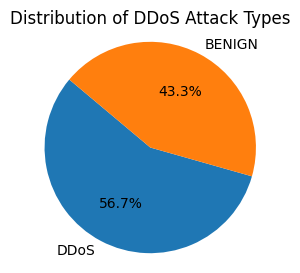

In [11]:
label_counts=df['Label'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of DDoS Attack Types')
plt.axis('equal')
plt.show()

A time series plot showing the number of records per timestamp, grouped by label (e.g., normal or attack). It visualizes how the volume of different types of network traffic changes over time, helping to identify patterns or spikes.

<Figure size 1200x600 with 0 Axes>

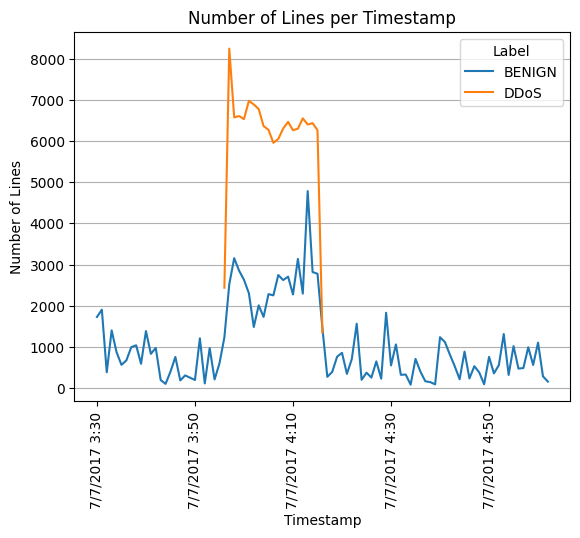

In [12]:
connection_grouped_by_time=df.groupby(['Label','Timestamp']).size().unstack(level=0)
plt.figure(figsize=(12, 6))
connection_grouped_by_time.plot()
plt.xlabel('Timestamp')
plt.ylabel('Number of Lines')
plt.xticks(rotation=90)
plt.title('Number of Lines per Timestamp')
plt.grid(axis='y')
plt.show()

In [13]:
# Dropping unnecessary columns
X = df_10.drop(columns=['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'Label'])
y = df_10['Label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
# Replacing inf values ​​with NaN to make them easier to handle
X_train = X_train.replace([np.inf, -np.inf], np.nan)

# Deleting rows with missing values ​​(including NaN and inf)
X_train_clean = X_train.dropna()

In [16]:
# Aligning y_train with the new X_train_clean
y_train_clean = y_train.loc[X_train_clean.index]


In [17]:
label_counts = df_10['Label'].value_counts()
print("Distribution of variable 'label':")
print(label_counts)

Distribution of variable 'label':
Label
DDoS      128027
BENIGN     97714
Name: count, dtype: int64


Selection of features

In [18]:
# Using logistic regression as the base model
model = LogisticRegression(max_iter=500)

In [19]:
# Forward selection - selection of the best 4 features
selector = SequentialFeatureSelector(model, n_features_to_select=4, direction='forward')
selector = selector.fit(X_train_clean , y_train_clean)

In [20]:
# Display selected features
selected_features = selector.get_support(indices=True)

# Display the names of selected features
selected_feature_names = X_train_clean.columns[selected_features]
print("Selected features (Forward Selection):")
print(selected_feature_names)

Selected features (Forward Selection):
Index(['Destination Port', 'Fwd Packet Length Mean', 'Init_Win_bytes_backward',
       'min_seg_size_forward'],
      dtype='object')


zmienne ktore zostaly wybrane, za pomoca i dlatego dokladny opis jakie maja znaczenia dla ddos

## **Destination Port**
- critical feature in cybersecurity because attackers often target specific services or protocols by flooding particular ports, disrupting the service running on that port. In the context of Distributed Denial of Service (DDoS) attacks, here’s how the Destination Port feature becomes relevant:

Port-based DDoS Attacks: Attackers often target specific ports to overwhelm a particular service. For instance:

HTTP Floods target web servers by overloading port 80 (HTTP) or port 443 (HTTPS) with fake traffic, making the web service unreachable to legitimate users.
DNS Amplification Attacks flood port 53 (DNS) to exhaust the target’s resources by abusing the DNS protocol.
Traffic Volume on Specific Ports: An unusually high volume of traffic targeting a single port could indicate a port-specific DDoS attack. For example, if the majority of the attack traffic is directed toward port 80, it likely means the attacker is attempting to overwhelm the web server.

Detection of Malicious Patterns: Anomalies in the distribution of destination ports can be a sign of an attack:

In normal traffic, a wide range of ports may be used depending on the services requested by users.
In contrast, during a DDoS attack, attackers often concentrate their attack on a single destination port, trying to overwhelm the service running on that port.
Exploiting Specific Services: Different types of DDoS attacks focus on exploiting vulnerabilities in specific services that are tied to certain ports:

SYN flood attacks often target open ports to exhaust system resources.
UDP flood attacks send large numbers of UDP packets to random destination ports, trying to overwhelm the target system with excessive packet processing.
Service-Specific Defense: Knowing the destination port can help with service-specific defenses. For example:

If a DDoS attack targets port 80 (HTTP), mitigation strategies might involve web application firewalls (WAFs) or rate limiting.
If port 22 (SSH) is being flooded, the server’s administrator might enforce stricter authentication measures or temporarily block the port to protect against brute-force or DoS attacks.


## **Fwd Packet Length Mean**
A lower-than-usual Fwd Packet Length Mean could indicate that an attacker is sending many small packets to overwhelm the server with as many requests as possible (e.g., in HTTP flood or SYN flood attacks).
A higher-than-usual Fwd Packet Length Mean might be seen in attacks where attackers attempt to exhaust bandwidth with large packets, such as in certain amplification attacks.

Abnormal Traffic Patterns: During a DDoS attack, the client (often an attacker or a botnet) sends a large volume of requests to overwhelm the server. This can cause abnormal packet sizes or traffic patterns in the forward direction. For example, in certain types of DDoS attacks (e.g., SYN flood attacks), attackers might send a high number of small packets, leading to a lower average forward packet length.

Detection of Flooding Attacks: In certain DDoS attacks, especially volumetric attacks (where the goal is to exhaust bandwidth or server resources), there could be significant deviations in the average packet size. A sudden increase or decrease in the average packet length could indicate an ongoing attack, as malicious traffic often differs in size from legitimate traffic.

Traffic Profiling: By analyzing the average forward packet length, security systems can profile what normal traffic looks like. For example, web traffic usually has a certain pattern of request sizes. If there is a deviation from this normal profile (e.g., the average packet length drops significantly due to an influx of small attack packets), this might indicate malicious activity.

Exploiting Protocols: Attackers can manipulate packet sizes to exploit certain vulnerabilities in network protocols. For instance, sending abnormally small or large packets may trigger buffer overflow vulnerabilities or force a server to handle resources inefficiently.

## **Init_Win_bytes_backward**
 represents the initial size of the backward (server-to-client) TCP window, and variations in this feature can be used to detect network anomalies, including potential DDoS attacks or other forms of cyberattacks. Unusual values could signal that the network or server is under stress, which is a typical outcome of such attacks.

Attack Detection: Abnormal window sizes in the backward flow could indicate malicious activity. For instance, during a DDoS attack, an attacker may send a flood of requests, overwhelming the server. This could result in unusual patterns in the backward flow (e.g., abnormal Init_Win_bytes_backward values due to the server struggling to handle the load).

Congestion and Resource Strain: DDoS attacks often lead to congestion on the victim’s network, which could be reflected in abnormal adjustments to the window size. For example, during a high-volume attack, the server might reduce the window size to prevent being overwhelmed, or there may be delays in acknowledgments due to resource exhaustion.

Protocol Anomalies: Changes in the TCP window size can also be indicative of protocol manipulation, where attackers try to exploit vulnerabilities in the TCP/IP stack by manipulating how data flows between a server and a client.

## **min_seg_size_forward**

refers to the minimum segment size of packets sent in the forward direction during a network communication session. Here’s a detailed breakdown:

Forward Flow:
The forward flow refers to the direction of data being sent from the client to the server in a network connection. The forward flow contains requests or commands from the client to the server, as opposed to the backward flow, which represents the server’s responses to the client.
Segment Size:
In the context of network protocols like TCP (Transmission Control Protocol), segment size refers to the amount of data (in bytes) that is encapsulated in a packet.
The minimum segment size forward is the smallest packet size (excluding headers) observed in the forward flow (client to server) during a connection.
Context in Cybersecurity and DDoS Attacks:
In the context of cybersecurity, especially with regards to Distributed Denial of Service (DDoS) attacks, the min_seg_size_forward feature can be a valuable indicator of malicious network activity.

Small Packet Attacks: Some types of DDoS attacks, such as SYN flood attacks or ICMP floods, involve sending a large number of small packets to overwhelm a target server. These attacks typically exploit the network’s ability to handle large volumes of very small data segments.

A very low min_seg_size_forward could indicate that the network is being bombarded with minimal-sized packets, which is a common tactic in such attacks.
Protocol Misuse: Attackers might send extremely small segments in an attempt to misuse network protocols. For example, in a SYN flood attack, the attacker sends many SYN packets (which are small segments) without completing the TCP handshake, leaving the server waiting for a response. This often results in a very low min_seg_size_forward.

Congestion and Resource Exhaustion: In a DDoS attack, the goal is often to overwhelm the server’s resources by sending a flood of requests. When attackers use small packets, they can trigger high rates of packet processing without actually sending large amounts of data. The server is forced to handle many small segments, leading to resource exhaustion.

Monitoring the minimum segment size can help detect when the network is receiving abnormally small requests, which can be an early warning of congestion or impending server overload.
Traffic Profiling: Under normal circumstances, most client-to-server communications (e.g., web requests, file transfers) have a typical range of segment sizes. An unusually low min_seg_size_forward might indicate abnormal traffic patterns. For example, legitimate requests might involve larger segments as part of normal data transfer, while a DDoS attack might flood the server with numerous small requests.

Detection of Slowloris-type Attacks: In some attacks, like the Slowloris attack, the attacker sends very small segments at a very slow rate to tie up server connections without fully establishing them. This can also result in a low minimum segment size in the forward flow. Monitoring this feature helps detect such low-bandwidth, high-impact attacks.



In [21]:
y_train_clean

,Label
25876,DDoS
116520,DDoS
150470,DDoS
98295,DDoS
168134,DDoS
...,...
119882,BENIGN
103697,BENIGN
131935,DDoS
146870,BENIGN


In [24]:
# counting values in Label
label_counts = df['Label'].value_counts()

print(label_counts)

Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64


In [25]:
y_train_clean.value_counts()

,count
Label,
DDoS,89519
BENIGN,68480


In [26]:
#Label encoder
le = LabelEncoder()

labels = df_10['Label']
le.fit(labels)

LabelEncoder()

## **MODEL I - applying best features selected by Forward Selection**


In [73]:
df_selected = df_10 [['Destination Port', 'Fwd Packet Length Mean',
       'Init_Win_bytes_backward', 'min_seg_size_forward']]

In [74]:
# initializing df_features

df_features = df_selected.to_dict(orient='records')

vec = DictVectorizer(dtype=np.float32)
features = vec.fit_transform(df_features).toarray()

df_selected.to_dict(orient='records') transforms DataFrame data into a list of dictionaries. DictVectorizer turns these dictionaries into a numerical feature matrix, where each column corresponds to one of the features (keys in the dictionary), and the values ​​in the cells are the assigned values ​​from the rows of the DataFrame. The final output is an array of NumPy features that can be used as input to a machine learning model.


In [75]:
features = (np.ceil(features)).astype(np.float32)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.30, random_state=42)

In [76]:
print("Number of samples in features:", features.shape[0])
print("Number of samples in labels:", len(labels))

Number of samples in features: 225741
Number of samples in labels: 225741


In [77]:
# Using Logistic Regression as the base model

model_lgI= LogisticRegression(max_iter=500)

In [79]:
# fitting
model_lgI.fit(X_train, y_train)

# prediction
y_pred_lrI = model_lgI.predict(X_test)

In [80]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred_lrI)
precision = precision_score(y_test, y_pred_lrI, average='weighted')  # 'weighted' for unbalanced classes
recall = recall_score(y_test, y_pred_lrI, average='weighted')
f1 = f1_score(y_test, y_pred_lrI, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lrI)
print("confusion matrix:")
print(conf_matrix)

# Classification report
report = classification_report(y_test, y_pred_lrI)
print("report:")
print(report)

Accuracy: 0.990328248896239
Precision: 0.9904878773173278
Recall: 0.990328248896239
F1-score: 0.9903142996911773
confusion matrix:
[[28563   653]
 [    2 38505]]
report:
              precision    recall  f1-score   support

      BENIGN       1.00      0.98      0.99     29216
        DDoS       0.98      1.00      0.99     38507

    accuracy                           0.99     67723
   macro avg       0.99      0.99      0.99     67723
weighted avg       0.99      0.99      0.99     67723



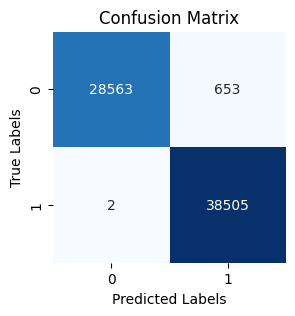

In [81]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lrI)

# plotting
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Model accuracy allows you to evaluate the overall performance of the classifier.
The classification report gives detailed metrics such as precision, recall and F1-score for each class.
The confusion matrix shows where the model makes classification errors.
Feature importance shows which features most influence the model's predictions.

In [82]:
# Initialize the KNN classifier
clf_knI = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
clf_knI.fit(X_train, y_train)

# Make predictions
y_pred_knI = clf_knI.predict(X_test)

# Print performance
acc_kn = accuracy_score(y_test, y_pred_knI)
print(f"accuracy_score: {acc_kn * 100:.2f}%")
print(classification_report(y_test, y_pred_knI))

accuracy_score: 99.41%
              precision    recall  f1-score   support

      BENIGN       1.00      0.99      0.99     29216
        DDoS       0.99      1.00      0.99     38507

    accuracy                           0.99     67723
   macro avg       0.99      0.99      0.99     67723
weighted avg       0.99      0.99      0.99     67723



Accuracy: 0.9941378852088655
Precision: 0.9941964081195156
Recall: 0.9941378852088655
F1-score: 0.994132919268586
confusion matrix:
[[28821   395]
 [    2 38505]]


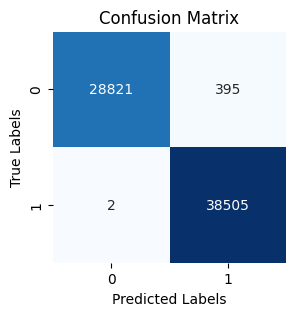

report:
              precision    recall  f1-score   support

      BENIGN       1.00      0.99      0.99     29216
        DDoS       0.99      1.00      0.99     38507

    accuracy                           0.99     67723
   macro avg       0.99      0.99      0.99     67723
weighted avg       0.99      0.99      0.99     67723



In [83]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred_knI)
precision = precision_score(y_test, y_pred_knI, average='weighted')
recall = recall_score(y_test, y_pred_knI, average='weighted')
f1 = f1_score(y_test, y_pred_knI, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knI)
print("confusion matrix:")
print(conf_matrix)

# plotting
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Classification report
report = classification_report(y_test, y_pred_knI)
print("report:")
print(report)

Accuracy: 0.9941378852088655
Precision: 0.9941957646124642
Recall: 0.9941378852088655
F1-score: 0.9941329456035097
confusion matrix:
[[28822   394]
 [    3 38504]]


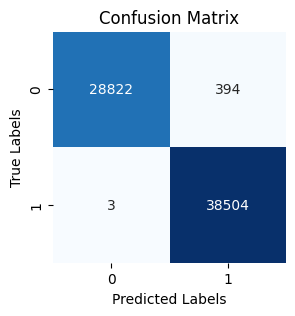

report:
              precision    recall  f1-score   support

      BENIGN       1.00      0.99      0.99     29216
        DDoS       0.99      1.00      0.99     38507

    accuracy                           0.99     67723
   macro avg       0.99      0.99      0.99     67723
weighted avg       0.99      0.99      0.99     67723



In [84]:
# Initialize the Decision Tree classifier
clf_dtI = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_dtI.fit(X_train, y_train)

# Make predictions
y_pred_dtI = clf_dtI.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_dtI)
precision = precision_score(y_test, y_pred_dtI, average='weighted')
recall = recall_score(y_test, y_pred_dtI, average='weighted')
f1 = f1_score(y_test, y_pred_dtI, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dtI)
print("confusion matrix:")
print(conf_matrix)

# plotting
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Classification report
report = classification_report(y_test, y_pred_dtI)
print("report:")
print(report)

In [85]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Naive Bayes classifier
clf_gI= GaussianNB()

# Train the classifier
clf_gI.fit(X_train, y_train)

# Make predictions
y_pred_gI = clf_gI.predict(X_test)

Accuracy: 0.9815572257578666
Precision: 0.9821325989003484
Recall: 0.9815572257578666
F1-score: 0.9815031702745172
confusion matrix:
[[27969  1247]
 [    2 38505]]


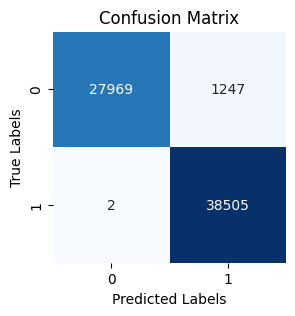

report:
              precision    recall  f1-score   support

      BENIGN       1.00      0.96      0.98     29216
        DDoS       0.97      1.00      0.98     38507

    accuracy                           0.98     67723
   macro avg       0.98      0.98      0.98     67723
weighted avg       0.98      0.98      0.98     67723



In [86]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred_gI)
precision = precision_score(y_test, y_pred_gI, average='weighted')
recall = recall_score(y_test, y_pred_gI, average='weighted')
f1 = f1_score(y_test, y_pred_gI, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gI)
print("confusion matrix:")
print(conf_matrix)

# plotting
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Classification report
report = classification_report(y_test, y_pred_gI)
print("report:")
print(report)

_______________________________________________________________________________________________________

## **MODEL II**

In the second model, I utilize a different set of features selected based on my expertise and understanding of DDoS attacks. For this model, I chose variables that are particularly relevant to identifying patterns commonly associated with such attacks. Specifically, the selected features include:

Destination Port: DDoS attacks often target specific ports, making this feature essential for distinguishing malicious from legitimate traffic.
Average Packet Size: This metric can vary significantly in DDoS scenarios, as attackers might send packets of unusual sizes to overload the system.
URG Flag Count: The count of URG (urgent) flags is considered, as unusual flag patterns can indicate suspicious activity or protocol abuse.
Flow Duration: The length of time a flow remains active can provide clues about abnormal connections typically seen in DDoS attacks.
By selecting these features, I aim to enhance the model's accuracy in detecting DDoS attacks by focusing on variables that are theoretically and practically relevant to attack behavior.

In [87]:
df_selected_II = df_10[['Destination Port', 'Average Packet Size', 'URG Flag Count','Flow Duration' ]]

Accuracy: 0.7383902071674321
Precision: 0.7709546805271866
Recall: 0.7383902071674321
F1-score: 0.7379457876827407
confusion matrix:
[[25390  3826]
 [13891 24616]]
report:
              precision    recall  f1-score   support

      BENIGN       1.00      0.98      0.99     29216
        DDoS       0.98      1.00      0.99     38507

    accuracy                           0.99     67723
   macro avg       0.99      0.99      0.99     67723
weighted avg       0.99      0.99      0.99     67723



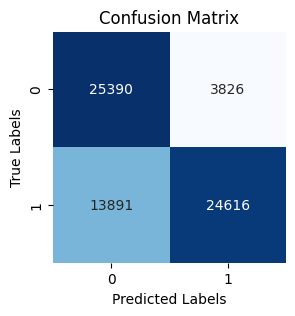

In [88]:
df_features = df_selected_II.to_dict(orient='records')

vec = DictVectorizer(dtype=np.float32)
features = vec.fit_transform(df_features).toarray()

features = (np.ceil(features)).astype(np.float32)


X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.30, random_state=42)


# Using logistic regression as the base model
model_lgII= LogisticRegression(max_iter=500)

# fitting
model_lgII.fit(X_train, y_train)

# prediction
y_pred_lrII = model_lgII.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_lrII)
precision = precision_score(y_test, y_pred_lrII, average='weighted')  # 'weighted' for unbalanced classes
recall = recall_score(y_test, y_pred_lrII, average='weighted')
f1 = f1_score(y_test, y_pred_lrII, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lrII)
print("confusion matrix:")
print(conf_matrix)

# Classification report
report = classification_report(y_test, y_pred_lr)
print("report:")
print(report)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lrII)

# plotting
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


accuracy_score: 95.63%
              precision    recall  f1-score   support

      BENIGN       0.97      0.93      0.95     29216
        DDoS       0.95      0.98      0.96     38507

    accuracy                           0.96     67723
   macro avg       0.96      0.95      0.96     67723
weighted avg       0.96      0.96      0.96     67723

Accuracy: 0.9563220766947713
Precision: 0.9565906290129789
Recall: 0.9563220766947713
F1-score: 0.9562148629891278
confusion matrix:
[[27206  2010]
 [  948 37559]]


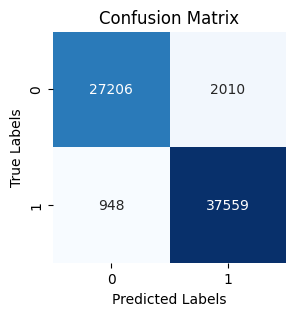

report:
              precision    recall  f1-score   support

      BENIGN       0.97      0.93      0.95     29216
        DDoS       0.95      0.98      0.96     38507

    accuracy                           0.96     67723
   macro avg       0.96      0.95      0.96     67723
weighted avg       0.96      0.96      0.96     67723



In [90]:
# Initialize the KNN classifier
clf_knII = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
clf_knII.fit(X_train, y_train)

# Make predictions
y_pred_knII = clf_knII.predict(X_test)

# Print performance
acc_kn = accuracy_score(y_test, y_pred_knII)
print(f"accuracy_score: {acc_kn * 100:.2f}%")
print(classification_report(y_test, y_pred_knII))

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_knII)
precision = precision_score(y_test, y_pred_knII, average='weighted')
recall = recall_score(y_test, y_pred_knII, average='weighted')
f1 = f1_score(y_test, y_pred_knII, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knII)
print("confusion matrix:")
print(conf_matrix)

# plotting
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Classification report
report = classification_report(y_test, y_pred_knII)
print("report:")
print(report)

Accuracy: 0.9991288040990506
Precision: 0.9991288724071313
Recall: 0.9991288040990506
F1-score: 0.9991288202710358
confusion matrix:
[[29191    25]
 [   34 38473]]


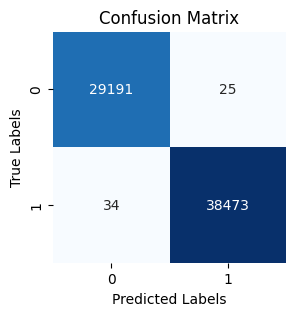

report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     29216
        DDoS       1.00      1.00      1.00     38507

    accuracy                           1.00     67723
   macro avg       1.00      1.00      1.00     67723
weighted avg       1.00      1.00      1.00     67723



In [92]:
# Initialize the Decision Tree classifier
clf_dtII = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_dtII.fit(X_train, y_train)

# Make predictions
y_pred_dtII = clf_dtII.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_dtII)
precision = precision_score(y_test, y_pred_dtII, average='weighted')
recall = recall_score(y_test, y_pred_dtII, average='weighted')
f1 = f1_score(y_test, y_pred_dtII, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dtII)
print("confusion matrix:")
print(conf_matrix)

# plotting
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Classification report
report = classification_report(y_test, y_pred_dtII)
print("report:")
print(report)

Accuracy: 0.7508084402640166
Precision: 0.826678830846928
Recall: 0.7508084402640166
F1-score: 0.7226174026466538
confusion matrix:
[[12342 16874]
 [    2 38505]]


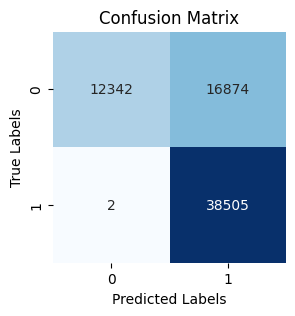

report:
              precision    recall  f1-score   support

      BENIGN       1.00      0.42      0.59     29216
        DDoS       0.70      1.00      0.82     38507

    accuracy                           0.75     67723
   macro avg       0.85      0.71      0.71     67723
weighted avg       0.83      0.75      0.72     67723



In [93]:
# Initialize the Naive Bayes classifier
clf_gII = GaussianNB()

# Train the classifier
clf_gII.fit(X_train, y_train)

# Make predictions
y_pred_gII = clf_gII.predict(X_test)
# Model evaluation
accuracy = accuracy_score(y_test, y_pred_gII)
precision = precision_score(y_test, y_pred_gII, average='weighted')
recall = recall_score(y_test, y_pred_gII, average='weighted')
f1 = f1_score(y_test, y_pred_gII, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_g)
print("confusion matrix:")
print(conf_matrix)

# plotting
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
report = classification_report(y_test, y_pred_gII)
print("report:")
print(report)

___________________________________________________________________________________________________________________

## **MODEL III** - checking just one feature

Monitoring ***mean forward packet length*** can help in identifying potential security threats. For instance, DDoS attacks often involve sending a large number of small packets to overwhelm a target, leading to unusual patterns in packet lengths.
For example, a sudden drop in average packet length may indicate a change in the type of data being transferred, which could be the result of a DDoS attack or other anomaly.
It can also impact the efficiency of data transmission. Smaller packets may lead to higher overhead due to the additional headers required for each packet, while larger packets can improve throughput but may also increase the chances of fragmentation.

In [94]:
df_selected_III = df_10[['Fwd Packet Length Mean']]

Accuracy: 0.8646397826440058
Precision: 0.8906675359792073
Recall: 0.8646397826440058
F1-score: 0.8592452614979686
confusion matrix:
[[20049  9167]
 [    0 38507]]
report:
              precision    recall  f1-score   support

      BENIGN       1.00      0.69      0.81     29216
        DDoS       0.81      1.00      0.89     38507

    accuracy                           0.86     67723
   macro avg       0.90      0.84      0.85     67723
weighted avg       0.89      0.86      0.86     67723



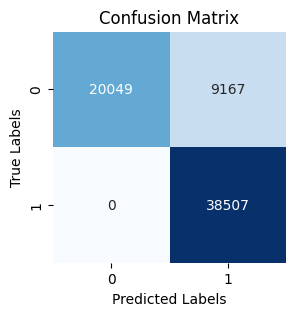

In [95]:
df_features = df_selected_III.to_dict(orient='records')
# df_features

vec = DictVectorizer(dtype=np.float32)
features = vec.fit_transform(df_features).toarray()

features = (np.ceil(features)).astype(np.float32)


X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.30, random_state=42)

# Using logistic regression as the base model
model_lgIII = LogisticRegression(max_iter=500)

# fitting
model_lgIII.fit(X_train, y_train)

# prediction
y_pred_lrIII = model_lgIII.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_lrIII)
precision = precision_score(y_test, y_pred_lrIII, average='weighted')  # 'weighted' for unbalanced classes
recall = recall_score(y_test, y_pred_lrIII, average='weighted')
f1 = f1_score(y_test, y_pred_lrIII, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lrIII)
print("confusion matrix:")
print(conf_matrix)

# Classification report
report = classification_report(y_test, y_pred_lrIII)
print("report:")
print(report)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lrIII)

# plotting
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

accuracy_score: 89.83%
              precision    recall  f1-score   support

      BENIGN       1.00      0.76      0.87     29216
        DDoS       0.85      1.00      0.92     38507

    accuracy                           0.90     67723
   macro avg       0.92      0.88      0.89     67723
weighted avg       0.91      0.90      0.90     67723

Accuracy: 0.8983211021366448
Precision: 0.9136609114616221
Recall: 0.8983211021366448
F1-score: 0.8957110636501499
confusion matrix:
[[22338  6878]
 [    8 38499]]


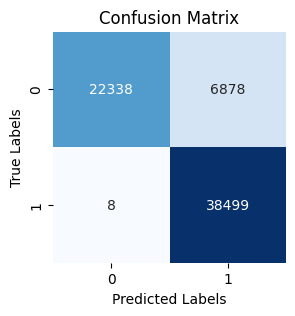

report:
              precision    recall  f1-score   support

      BENIGN       1.00      0.76      0.87     29216
        DDoS       0.85      1.00      0.92     38507

    accuracy                           0.90     67723
   macro avg       0.92      0.88      0.89     67723
weighted avg       0.91      0.90      0.90     67723



In [96]:
# Initialize the KNN classifier
clf_knIII = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
clf_knIII .fit(X_train, y_train)

# Make predictions
y_pred_knIII = clf_knIII.predict(X_test)

# Print performance
acc_kn = accuracy_score(y_test, y_pred_knIII)
print(f"accuracy_score: {acc_kn * 100:.2f}%")
print(classification_report(y_test, y_pred_knIII))

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_knIII)
precision = precision_score(y_test, y_pred_knIII, average='weighted')
recall = recall_score(y_test, y_pred_knIII, average='weighted')
f1 = f1_score(y_test, y_pred_knIII, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knIII)
print("confusion matrix:")
print(conf_matrix)

# plotting
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Classification report
report = classification_report(y_test, y_pred_knIII)
print("report:")
print(report)

Accuracy: 0.8983211021366448
Precision: 0.9136609114616221
Recall: 0.8983211021366448
F1-score: 0.8957110636501499
confusion matrix:
[[22338  6878]
 [    8 38499]]


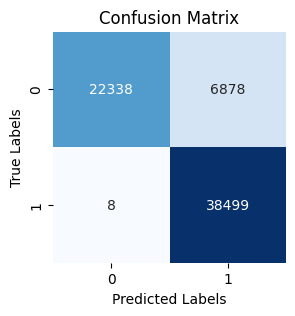

report:
              precision    recall  f1-score   support

      BENIGN       1.00      0.76      0.87     29216
        DDoS       0.85      1.00      0.92     38507

    accuracy                           0.90     67723
   macro avg       0.92      0.88      0.89     67723
weighted avg       0.91      0.90      0.90     67723



In [97]:
# Initialize the Decision Tree classifier
clf_dtIII = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_dtIII.fit(X_train, y_train)

# Make predictions
y_pred_dtIII = clf_dtIII.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_dtIII)
precision = precision_score(y_test, y_pred_dtIII, average='weighted')
recall = recall_score(y_test, y_pred_dtIII, average='weighted')
f1 = f1_score(y_test, y_pred_dtIII, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dtIII)
print("confusion matrix:")
print(conf_matrix)

# plotting
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Classification report
report = classification_report(y_test, y_pred_dtIII)
print("report:")
print(report)

Accuracy: 0.8934335454719963
Precision: 0.9102538171527023
Recall: 0.8934335454719963
F1-score: 0.8904904622102323
confusion matrix:
[[21999  7217]
 [    0 38507]]


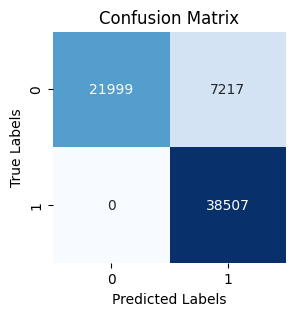

report:
              precision    recall  f1-score   support

      BENIGN       1.00      0.75      0.86     29216
        DDoS       0.84      1.00      0.91     38507

    accuracy                           0.89     67723
   macro avg       0.92      0.88      0.89     67723
weighted avg       0.91      0.89      0.89     67723



In [98]:
# Initialize the Naive Bayes classifier
clf_gIII = GaussianNB()

# Train the classifier
clf_gIII.fit(X_train, y_train)

# Make predictions
y_pred_gIII = clf_gIII.predict(X_test)
# Model evaluation
accuracy = accuracy_score(y_test, y_pred_gIII)
precision = precision_score(y_test, y_pred_gIII, average='weighted')
recall = recall_score(y_test, y_pred_gIII, average='weighted')
f1 = f1_score(y_test, y_pred_gIII, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gIII)
print("confusion matrix:")
print(conf_matrix)

# plotting
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
report = classification_report(y_test, y_pred_gIII)
print("report:")
print(report)

# **Conclusion**

The conclusion drawn from the models is that all variations incorporating features related to Fwd Packet Length Mean or average packet length consistently yield excellent performance metrics. This demonstrates that packet lengths and their volume are strong indicators of DDoS attacks. The significant role these features play suggests that future research and detection systems can reliably utilize packet size patterns as a key factor for identifying and mitigating DDoS threats. These findings confirm that packet behavior analysis is a critical component in cybersecurity, specifically in the detection of volumetric attacks like DDoS.